In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import simplejson as json

df = pd.read_csv("pima-data.csv")

In [4]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=73) 

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [6]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())


nb_predict_train = nb_model.predict(X_train)
nb_predict_test = nb_model.predict(X_test)


In [7]:
def predictSingleRecord(record):
    X_single = np.array(record).reshape(1,8)
    return nb_model.predict_proba(X_single)

In [8]:
print(predictSingleRecord([100,100,100,100,100,100,100,100]))

[[ 0.  1.]]


In [9]:
conf_arr = metrics.confusion_matrix(y_test, nb_predict_test)

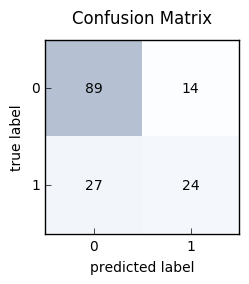

In [10]:
fig, ax = plot_confusion_matrix(conf_mat=conf_arr)
ax.set_title('Confusion Matrix')
plt.show()

conf_array = metrics.confusion_matrix(y_test, nb_predict_test)
true_pos = conf_array[1][1]
true_neg = conf_array[0][0]
false_pos = conf_array[0][1]
false_neg  = conf_array[1][0]

In [11]:
print(metrics.precision_score(y_test, nb_predict_test))
print(true_pos)
print(true_neg)
print(false_pos)
print(false_neg)

0.631578947368
24
89
14
27


In [12]:
true_pos = conf_array[1][1]
true_neg = conf_array[0][0]
false_pos = conf_array[0][1]
false_neg  = conf_array[1][0]

data = {'conf' : {
            'true_pos' : np.int64(true_pos).item(),
            'true_neg' : np.int64(true_neg).item(),
            'false_pos' : np.int64(false_pos).item(),
            'false_neg'  : np.int64(false_neg).item(),
            }, 
        'precision' : metrics.precision_score(y_test, nb_predict_test),
        'sensitvity' : metrics.recall_score(y_test, nb_predict_test),
        'specificity' : true_neg/(true_neg + false_pos),
        'accuracy' : metrics.accuracy_score(y_test, nb_predict_test)
       }
print(type(data['precision']))
print(json.dumps(data))


<class 'numpy.float64'>
{"accuracy": 0.7337662337662337, "sensitvity": 0.47058823529411764, "specificity": 0.8640776699029126, "conf": {"true_neg": 89, "false_pos": 14, "true_pos": 24, "false_neg": 27}, "precision": 0.631578947368421}


In [13]:
    conf_array = metrics.confusion_matrix(y_test, nb_predict_test)
    nb_predict_test = nb_model.predict(X_test)
    
    true_pos = conf_array[1][1]
    true_neg = conf_array[0][0]
    false_pos = conf_array[0][1]
    false_neg  = conf_array[1][0]

    data = {'conf' : {
                'true_pos' : np.int64(true_pos).item(),
                'true_neg' : np.int64(true_neg).item(),
                'false_pos' : np.int64(false_pos).item(),
                'false_neg'  : np.int64(false_neg).item(),
                }, 
            'precision' : metrics.precision_score(y_test, nb_predict_test),
            'sensitvity' : metrics.recall_score(y_test, nb_predict_test),
            'specificity' : true_neg/(true_neg + false_pos),
            'accuracy' : metrics.accuracy_score(y_test, nb_predict_test)
           }
    print(data, end="")

{'accuracy': 0.73376623376623373, 'sensitvity': 0.47058823529411764, 'specificity': 0.86407766990291257, 'conf': {'true_neg': 89, 'false_pos': 14, 'true_pos': 24, 'false_neg': 27}, 'precision': 0.63157894736842102}